In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]

In [3]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta

array([[4.29010912],
       [2.72052739]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_new = X_new_b.dot(theta)

In [6]:
y_new

array([[4.29010912],
       [9.7311639 ]])

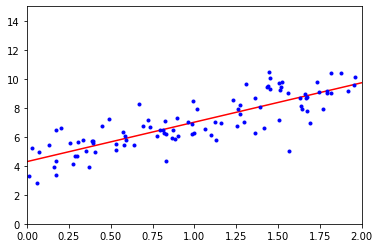

In [7]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_new, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.29010912]), array([[2.72052739]]))

In [10]:
lin_reg.predict(X_new)

array([[4.29010912],
       [9.7311639 ]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [12]:
theta_best_svd

array([[4.29010912],
       [2.72052739]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.29010912],
       [2.72052739]])

In [14]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.29010912],
       [2.72052739]])

In [15]:
t0, t1 = 5, 50
def learning_schedule(t):
    return (t0 / (t + t1))

n_epochs = 50
theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        idx = np.random.randint(m)
        xi = X_b[idx:idx+1]
        yi = y[idx:idx+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
theta

array([[4.28108575],
       [2.757033  ]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, penalty=None)


In [17]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25428285]), array([2.69340409]))

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree=2, include_bias=False)
X_poly =  poly_f.fit_transform(X)
X[0]

array([-2.16119661])

In [22]:
X_poly[0]

array([-2.16119661,  4.6707708 ])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [24]:
lin_reg.intercept_, lin_reg.coef_

(array([1.93103767]), array([[0.94136467, 0.51169009]]))